In [3]:
## Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
## Read Data
batch1 = pd.read_parquet("C:/Users/k_vsl/Documents/Erdos/IceCubeData/batch_1.parquet/batch_1.parquet")
directions = pd.read_parquet("C:/Users/k_vsl/Documents/Erdos/IceCubeData/train_meta.parquet/train_meta.parquet")
sensors = pd.read_csv("C:/Users/k_vsl/Documents/Erdos/IceCubeData/sensor_geometry.csv")

In [4]:
batch1.dtypes

sensor_id      int16
time           int64
charge       float64
auxiliary       bool
dtype: object

In [5]:
directions.dtypes

batch_id               int64
event_id               Int64
first_pulse_index      int64
last_pulse_index       int64
azimuth              float64
zenith               float64
dtype: object

In [6]:
sensors.dtypes

sensor_id      int64
x            float64
y            float64
z            float64
dtype: object

In [25]:
sensors.head()

,sensor_id,x,y,z
0,0,-256.14,-521.08,496.03
1,1,-256.14,-521.08,479.01
2,2,-256.14,-521.08,461.99
3,3,-256.14,-521.08,444.97
4,4,-256.14,-521.08,427.95


In [8]:
directions[directions["event_id"] == 24]

,batch_id,event_id,first_pulse_index,last_pulse_index,azimuth,zenith
0,1,24,0,60,5.029555,2.087498


In [64]:
batch1.loc[24].head(20)

,sensor_id,time,charge,auxiliary
event_id,,,,
24,3918,5928,1.325,True
24,4157,6115,1.175,True
24,3520,6492,0.925,True
24,5041,6665,0.225,True
24,2948,8054,1.575,True
24,860,8124,0.675,True
24,2440,8284,1.625,True
24,1743,8478,0.775,True
24,3609,8572,1.025,True


In [10]:
batch1.head()

,sensor_id,time,charge,auxiliary
event_id,,,,
24,3918,5928,1.325,True
24,4157,6115,1.175,True
24,3520,6492,0.925,True
24,5041,6665,0.225,True
24,2948,8054,1.575,True


In [9]:
event_ids = list(set(batch1.index))
event_ids

[2621445,
 2097166,
 1048595,
 524309,
 3145750,
 1572887,
 24,
 3145752,
 524315,
 2097181,
 1048606,
 524319,
 1048607,
 2097182,
 1048613,
 1572901,
 2621477,
 524328,
 41,
 524332,
 2621485,
 1048627,
 3145780,
 2097208,
 3145784,
 59,
 524347,
 3145788,
 524351,
 1048639,
 2621504,
 524354,
 67,
 2621506,
 3145792,
 2621510,
 3145794,
 72,
 1572936,
 3145801,
 524363,
 1048651,
 77,
 524365,
 79,
 82,
 2097242,
 2097243,
 1572956,
 1572957,
 1572965,
 2621542,
 524391,
 3145832,
 1572970,
 2621546,
 2621550,
 524399,
 1572978,
 524405,
 2621557,
 121,
 2621562,
 1048700,
 1572989,
 127,
 1572994,
 2621571,
 2621579,
 140,
 2097293,
 2621580,
 1048719,
 2621587,
 1573019,
 1573021,
 3145886,
 3145887,
 524450,
 3145890,
 2097317,
 1573032,
 2097323,
 2097324,
 1573037,
 2621613,
 1573043,
 2097333,
 3145910,
 1573053,
 1048769,
 1048770,
 2621634,
 1573067,
 524492,
 1573069,
 2621643,
 2097359,
 1573073,
 3145941,
 524502,
 2097367,
 3145944,
 1048794,
 221,
 2097376,
 2097380,
 5

In [48]:
detections["time"].iloc[0]

5928

In [5]:
## Function to Visualize Directions for each event
def event_plot(event_id, 
              aux_incl, 
              show_sensors,
              show_true_direction,
              batch,
              true_direction,
              geometry):
    
    # Isolate the detections we want to use
    detections = (batch.loc[event_id])
    if aux_incl == False: 
        detections = detections[detections["auxiliary"] == False]
    
    # Get geometry of detections
    x = [geometry.iloc[s].x for s in detections["sensor_id"]]
    y = [geometry.iloc[s].y for s in detections["sensor_id"]]
    z = [geometry.iloc[s].z for s in detections["sensor_id"]]
    
    # Get times and charges for each detection
    time0 = detections["time"].iloc[0]
    times = detections["time"] - time0
    charges = detections["charge"] * 5
    
    # True direction
    direction = true_direction[true_direction["event_id"] == event_id]
    
    # Prepare the plots
    # For each detection, draw a point (x,y,z) color coated with time and a size corresponding to the charge
    scale = 600
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(projection='3d')
    im = ax.scatter(x,y,z,c = times, cmap = 'rainbow_r', s = charges, alpha = 1)
    
    if show_sensors == True: 
        ax.scatter(geometry.x, geometry.y, geometry.z, c = '0.1', alpha = .03, s = .5)
        
    if show_true_direction == True: 
        az = (direction.iloc[0]).azimuth
        ze = (direction.iloc[0]).zenith 
        xhat = np.cos(az)*np.sin(ze)
        yhat = np.sin(az)*np.sin(ze)
        zhat = np.cos(ze)
        
        xdir = scale*xhat
        ydir = scale*yhat
        zdir = scale*zhat
            
        xs = [0, xdir]
        ys = [0, ydir]
        zs = [0, zdir]
            
        ax.plot(xs, ys, zs, 
                    '--',
                    c='red',
                    linewidth=0.75,
                    label='true direction')
        
    
    
    # Display plot
    plt.colorbar(im,
                 orientation='vertical', 
                 label='Nanoseconds passed in event',
                 location='left',
                 fraction=0.02, 
                 pad=0.1)
    
    plt.title("Neutrino event " + str(event_id) + ", aux = " + str(aux_incl),
              fontsize=12)
    plt.legend(loc=(-0.3,0.9))
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$z$')
    
    ax.view_init(30,-45)
    
    ax.grid(False)

    
    

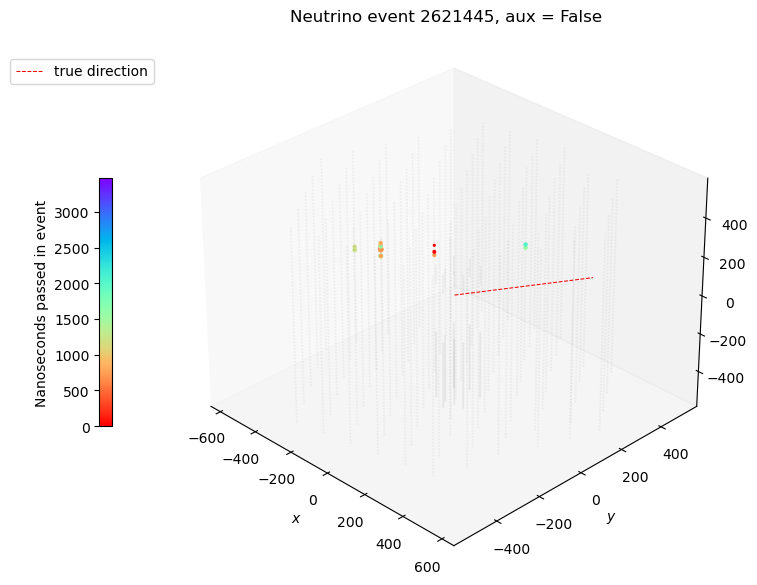

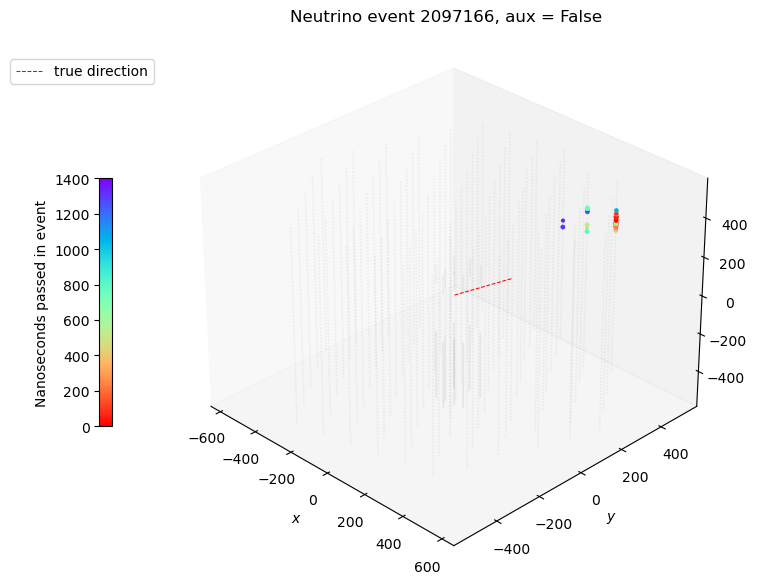

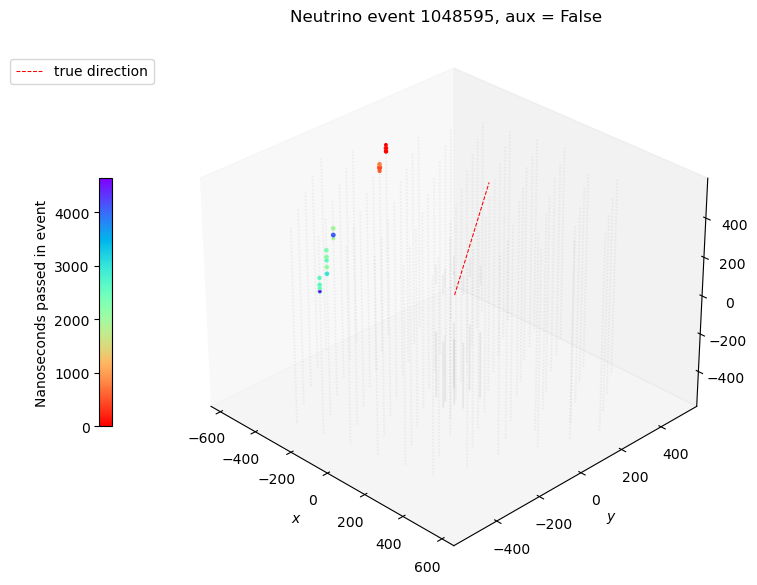

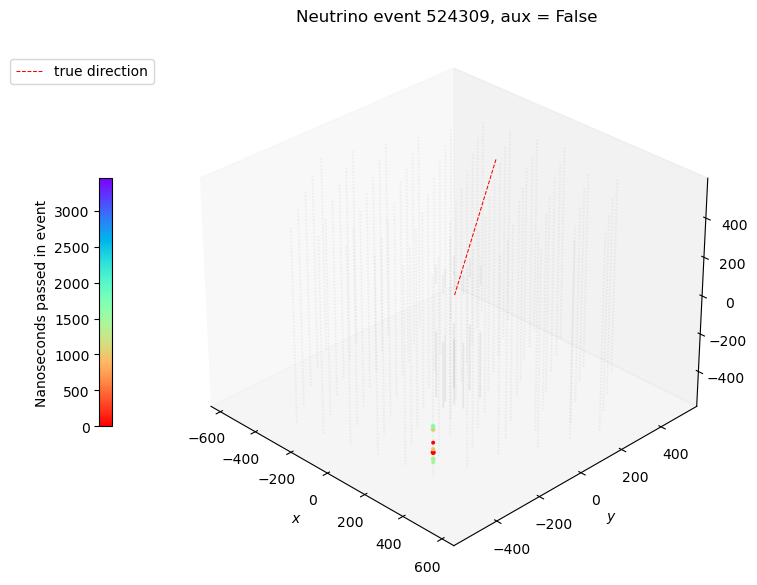

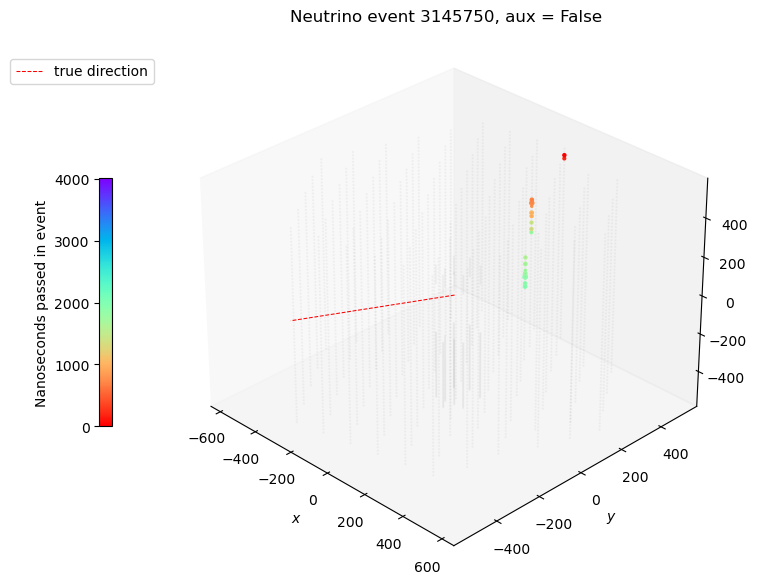

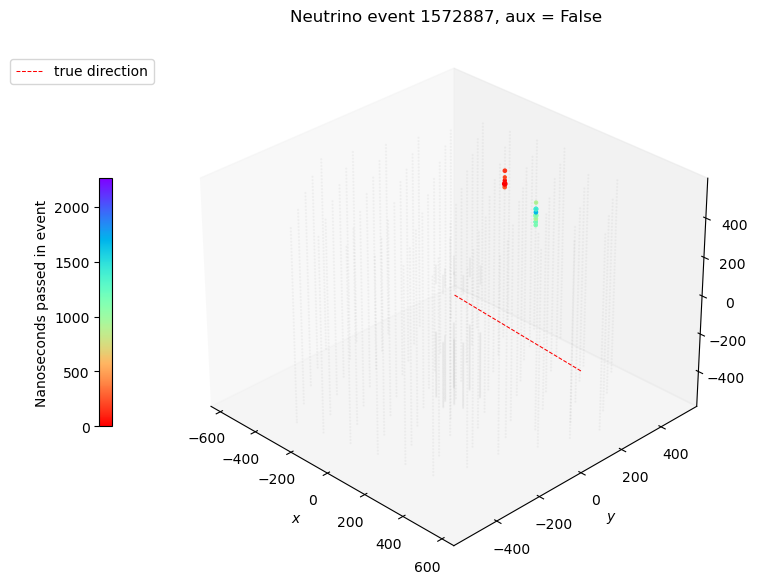

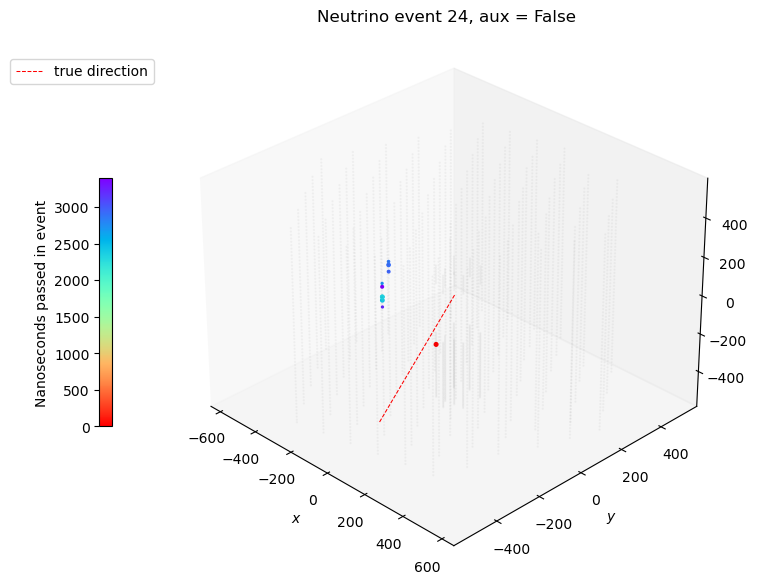

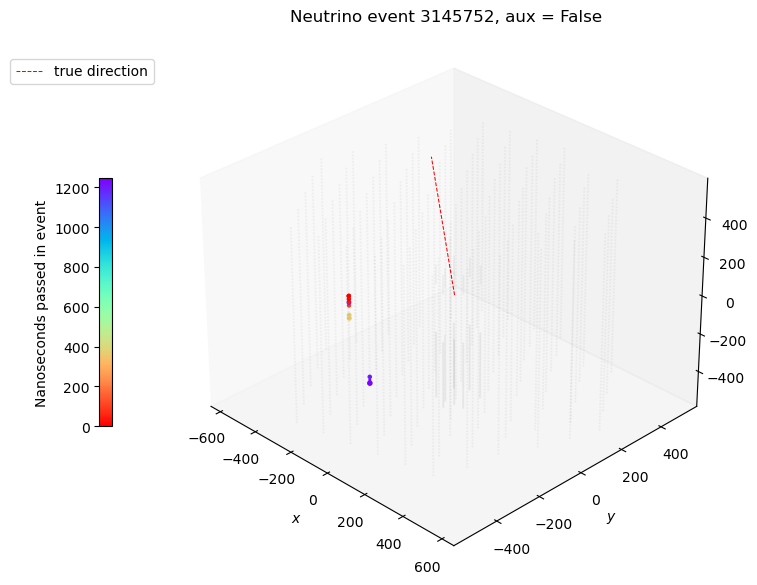

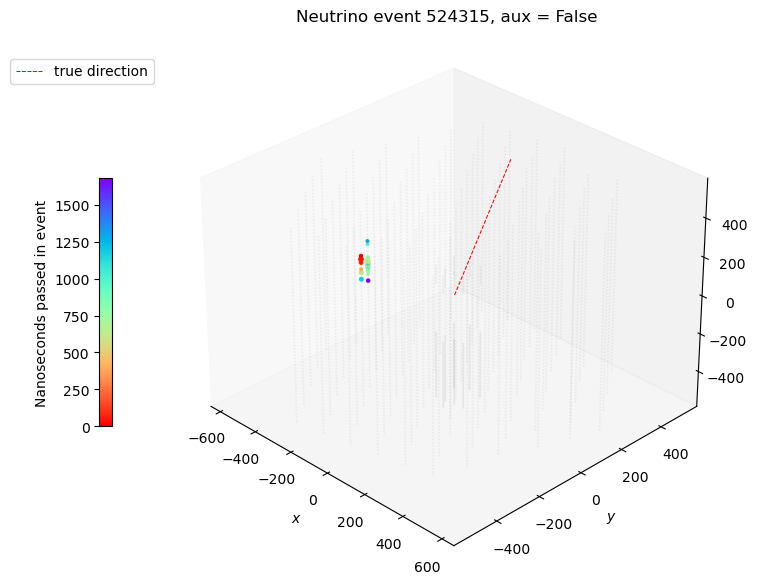

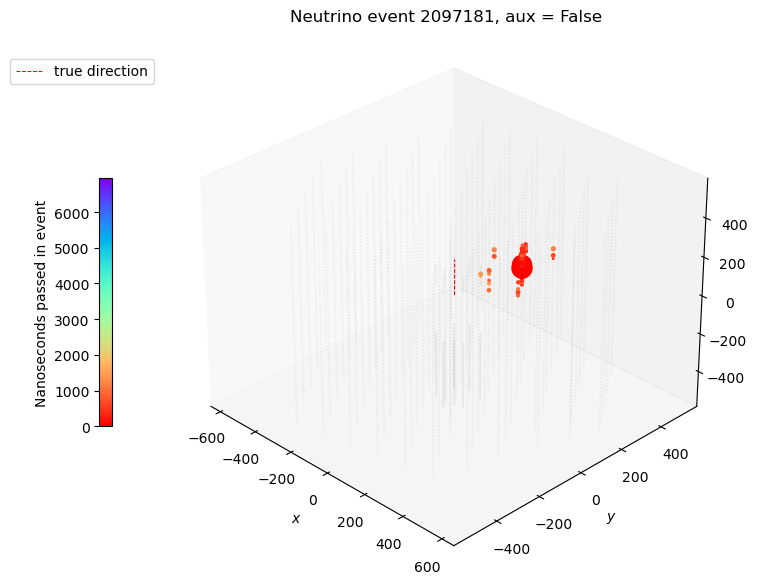

In [10]:
for i in event_ids[0:10]:
    event_plot(i, False, True, True, batch1, directions, sensors)


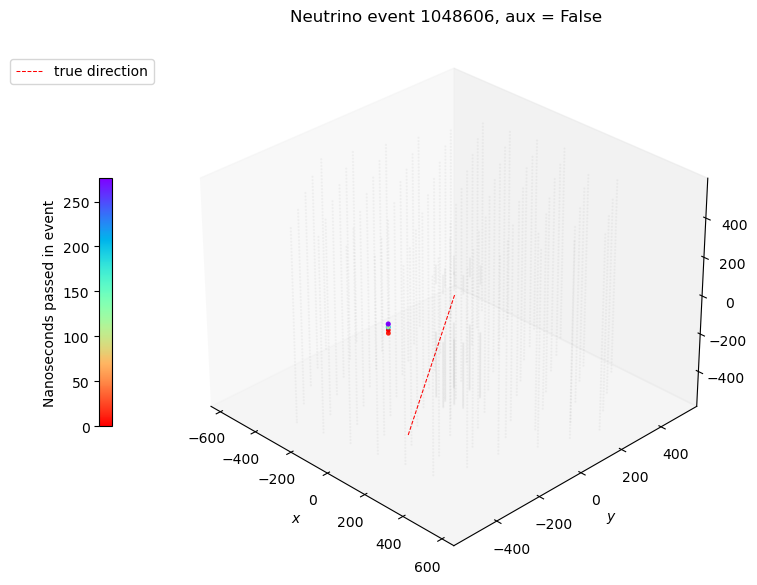

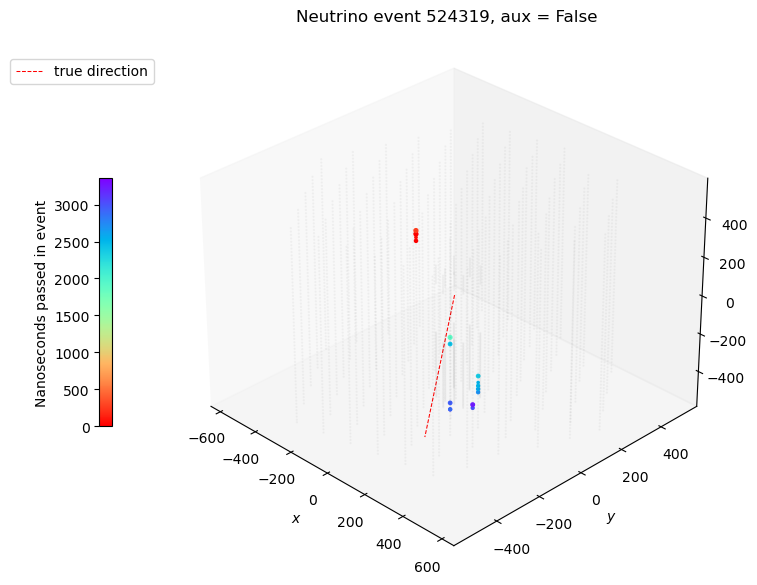

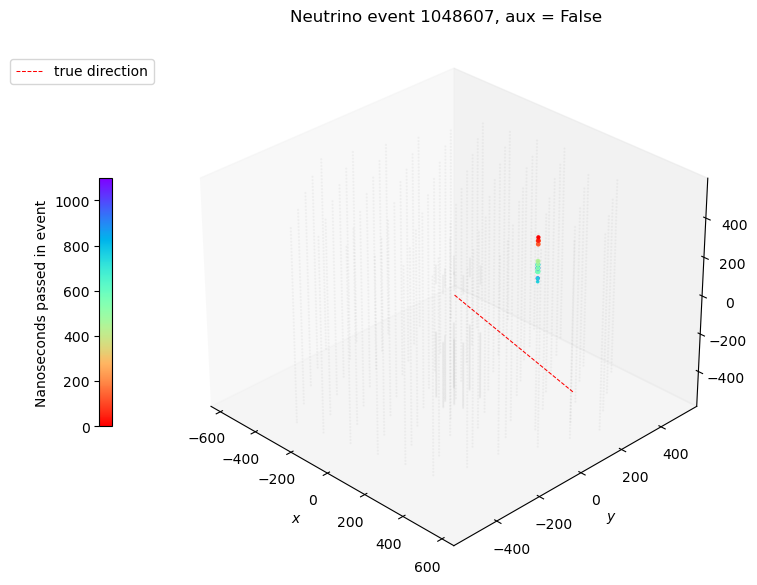

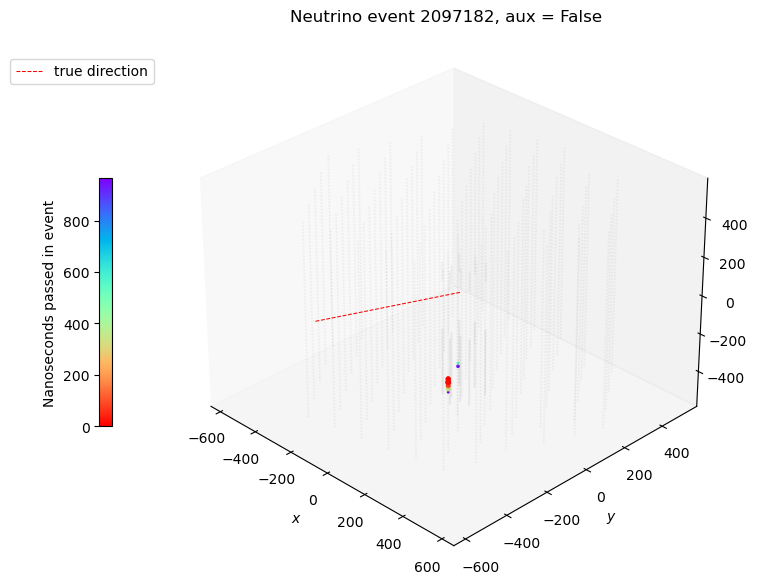

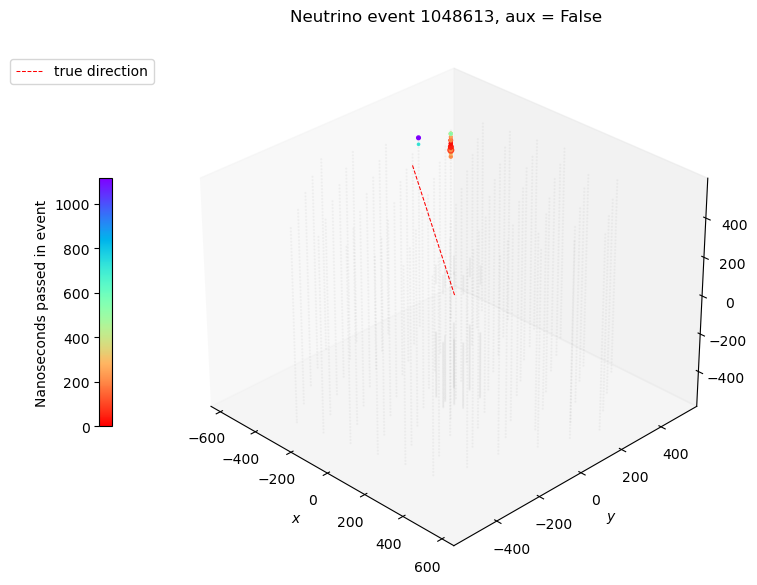

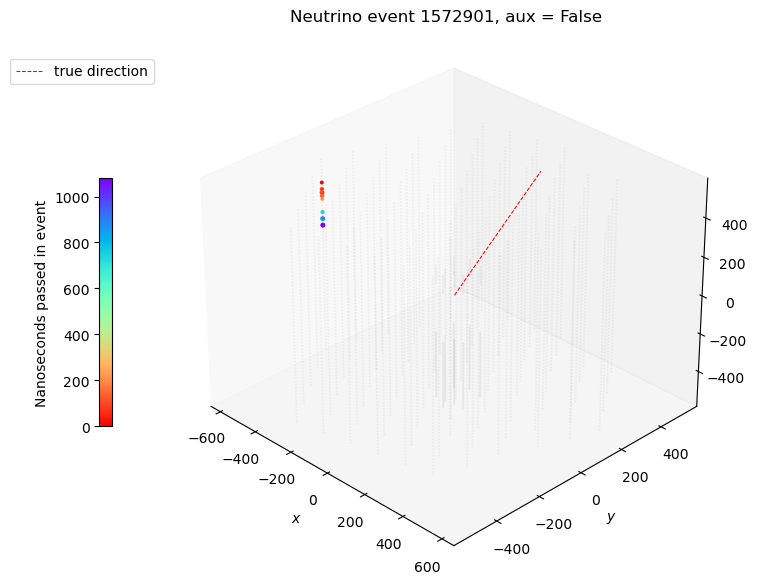

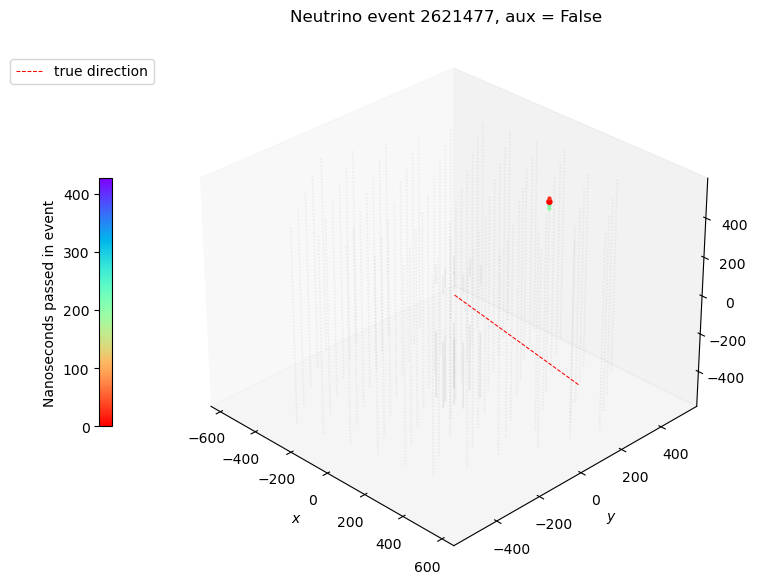

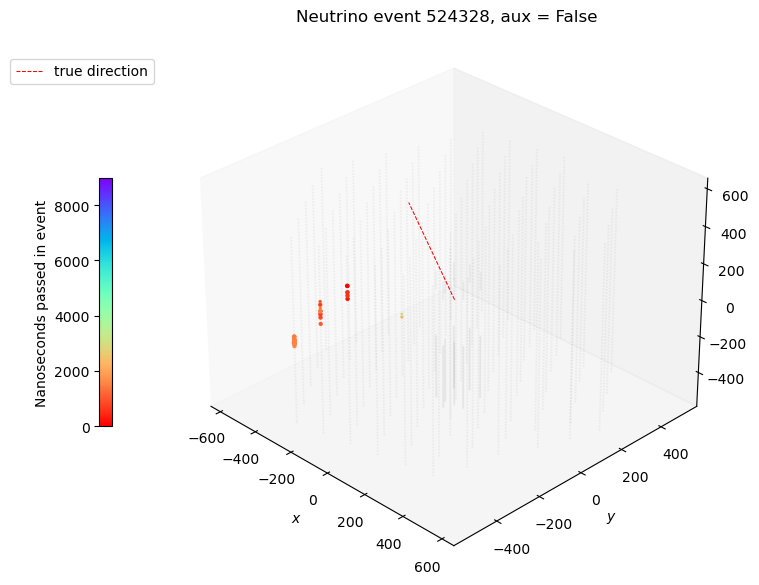

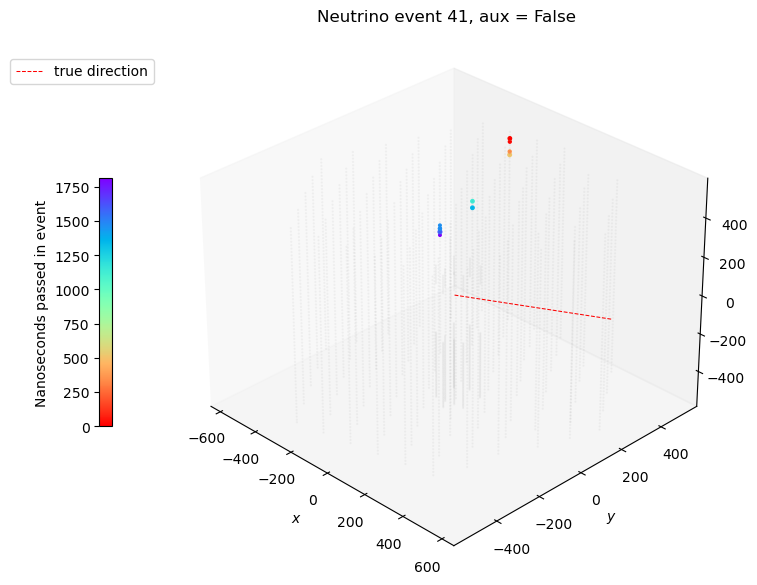

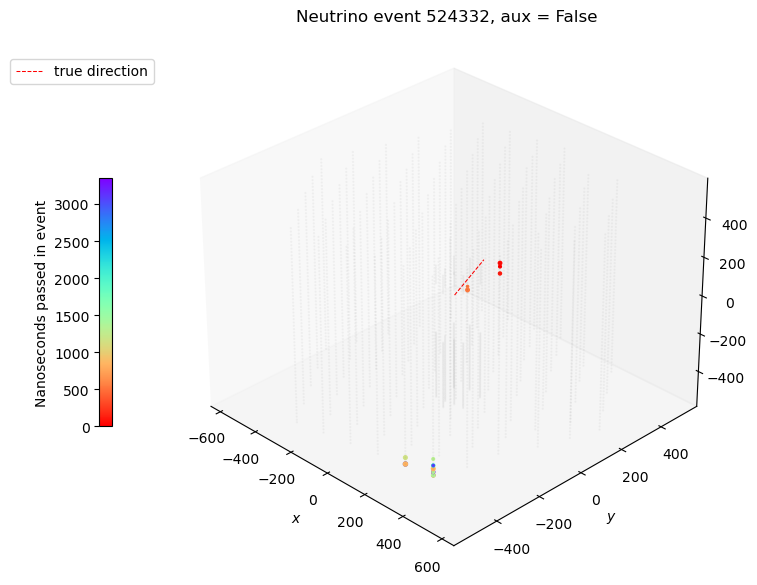

In [8]:
for i in event_ids[10:20]:
    event_plot(i, False, True, True, batch1, directions, sensors)

In [1]:
batch1.head()


NameError: name 'batch1' is not defined

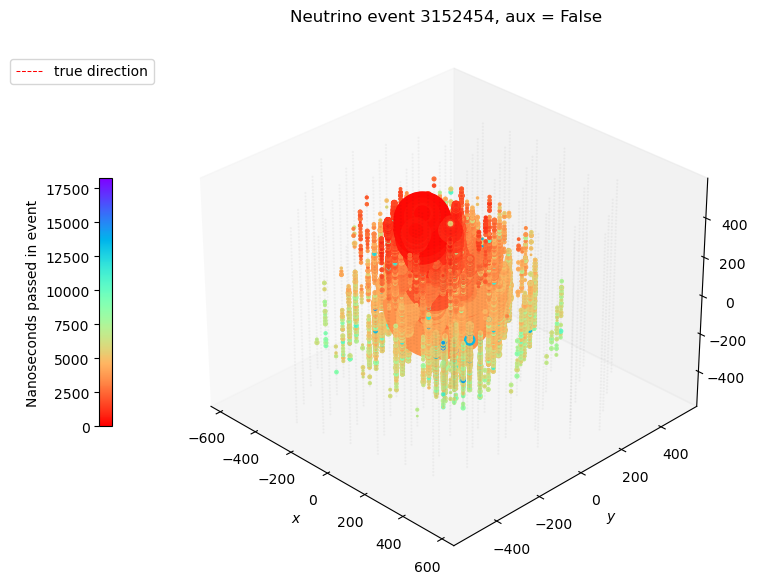

In [6]:
event_plot(3152454, False, True, True, batch1, directions, sensors)